# Functional Approximations by Trees and Neural Networks

Here we show how the function
$$
x \mapsto exp(4 x)
$$
can be easily approximated by a tree-based methods (Trees, Random Forest) and a neural network (2 Layered Neural Network)

# Functional Approximation by a Tree


In [1]:
import numpy as np
from SyncRNG import SyncRNG
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

(1000, 1)


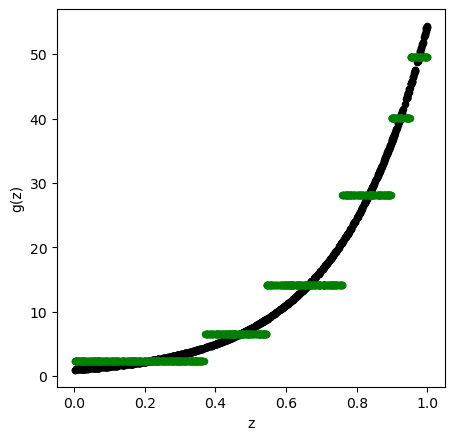

In [2]:
s = SyncRNG(seed = 123456)

X_train = np.zeros( 1000 ).reshape( 1000 , 1 )
print( X_train.shape )
for i in range( 0 , X_train.shape[0] ):
    X_train[ i , 0 ] = s.rand()


Y_train = np.exp( 4 * X_train )


TreeModel = DecisionTreeRegressor( random_state = 0, ccp_alpha = 2.02 )
TreeModel.fit( X_train , Y_train )
pred_TM = TreeModel.predict( X_train )


fig = plt.figure( figsize = ( 5 , 5 ) , dpi = 100 )
ax1 = fig.add_subplot( 111 )
ax1.scatter( X_train , Y_train, c='black', marker="o" , s = 20 )
ax1.scatter(  X_train , pred_TM , c='green', marker="o" , s = 20)
plt.xlabel( "z" )
plt.ylabel( "g(z)" )
plt.show()

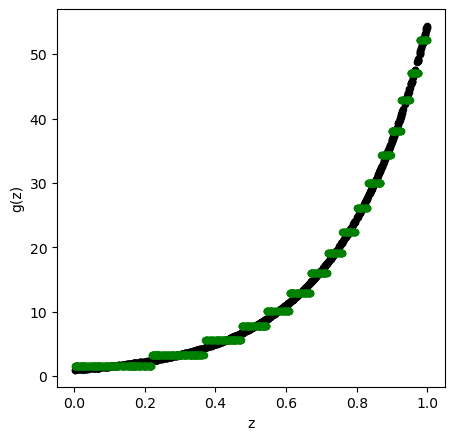

In [3]:
s = SyncRNG(seed = 123456)

X_train = np.zeros( 1000 ).reshape( 1000 , 1 )
for i in range( 0 , X_train.shape[0] ):
    X_train[ i , 0 ] = s.rand()

Y_train = np.exp( 4 * X_train )

TreeModel = DecisionTreeRegressor( random_state = 0, ccp_alpha = 2.02*0.0005/0.01 )
TreeModel.fit( X_train , Y_train )
pred_TM = TreeModel.predict( X_train )

fig = plt.figure( figsize = ( 5 , 5 ) , dpi = 100 )
ax1 = fig.add_subplot( 111 )
ax1.scatter( X_train , Y_train, c='black', marker="o" , s = 20 )
ax1.scatter(  X_train , pred_TM , c='green', marker="o" , s = 20)
plt.xlabel( "z" )
plt.ylabel( "g(z)" )
plt.show()

# Functional Approximation by RF

Here we show how the function
$$
x \mapsto exp(4 x)
$$
can be easily approximated by a tree-based method (Random Forest) and a neural network (2 Layered Neural Network)

C:\Users\User\AppData\Local\Temp\ipykernel_11540\3001534983.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFModel = RandomForestRegressor( random_state = 0 , n_estimators = 500 ,\


C:\Users\User\AppData\Local\Temp\ipykernel_11540\3001534983.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFModel.fit( X_train , Y_train )


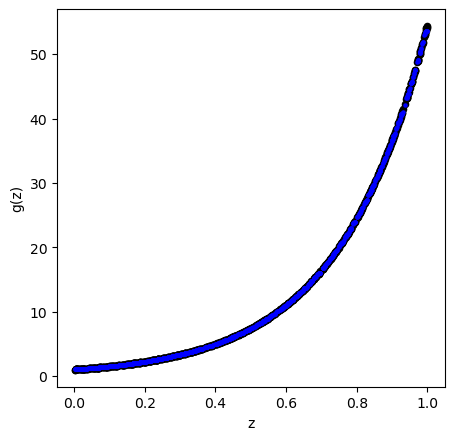

In [4]:
s = SyncRNG(seed = 123456)

X_train = np.zeros( 1000 ).reshape( 1000 , 1 )
for i in range( 0 , X_train.shape[0] ):
    X_train[ i , 0 ] = s.rand()

Y_train = np.exp( 4 * X_train )

## REstrictions to make RF from SKlearn
## similar to random forest from r package

if Y_train is not None and ( Y_train.dtype != str ):
    mtry = max( [ np.round( ( X_train.shape[ 1 ]/3 ) ).astype(int) , 1 ] )
else:
    mtry = np.round( np.sqrt( X_train.shape[ 1 ] ) ).astype(int)

if Y_train is not None and ( Y_train.dtype != str ):
    nodesize1 = 5
else:
    nodesize1 = 1

RFModel = RandomForestRegressor( random_state = 0 , n_estimators = 500 ,\
                               max_features = mtry , \
                               n_jobs = 4 , \
                               min_samples_leaf = nodesize1 ).\
                               fit( X_train , Y_train )

RFModel.fit( X_train , Y_train )
pred_RF = RFModel.predict( X_train )


fig = plt.figure( figsize = ( 5 , 5 ) , dpi = 100 )
ax1 = fig.add_subplot( 111 )
ax1.scatter( X_train , Y_train, c='black', marker="o" , s = 20 )
ax1.scatter(  X_train , pred_RF , c='blue', marker="o" , s = 5)
plt.xlabel( "z" )
plt.ylabel( "g(z)" )
plt.show()

# Boosted Trees

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


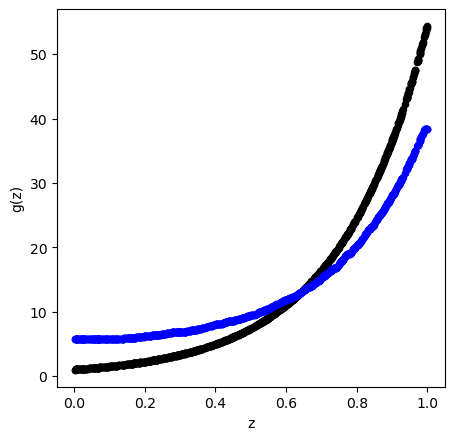

In [5]:
# max_depth = interaction.depth
# learning_rate = shrinkage
# n_estimators = n.trees
BoostTreemodel = GradientBoostingRegressor(random_state=0 ,  max_depth = 4 , learning_rate = 0.01 , n_estimators = 100 )
BoostTreemodel.fit( X_train, Y_train )
pred_BT = BoostTreemodel.predict( X_train )

fig = plt.figure( figsize = ( 5 , 5 ) , dpi = 100 )
ax1 = fig.add_subplot( 111 )
ax1.scatter( X_train , Y_train, c='black', marker="o" , s = 20 )
ax1.scatter(  X_train , pred_BT , c='blue', marker="o" , s = 20)
plt.xlabel( "z" )
plt.ylabel( "g(z)" )
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


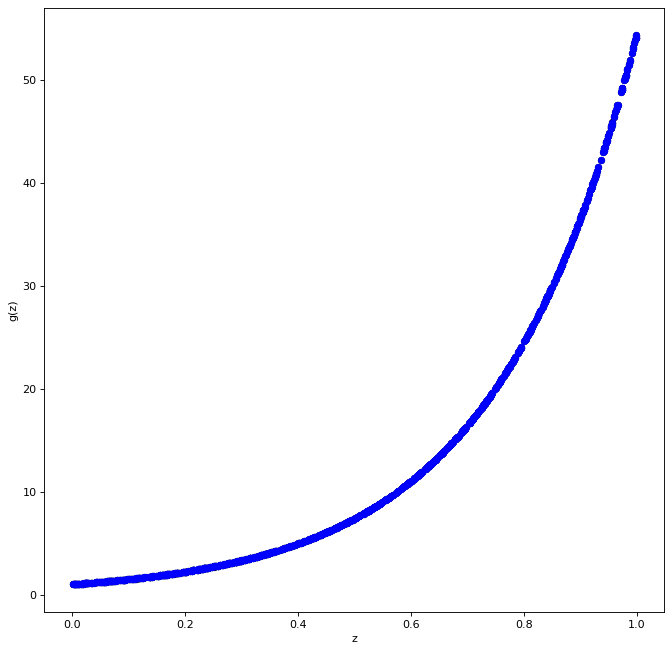

In [6]:
BoostTreemodel = GradientBoostingRegressor(random_state=0 ,  max_depth = 4 , learning_rate = 0.01 , n_estimators = 1000 )
BoostTreemodel.fit( X_train, Y_train )
pred_BT = BoostTreemodel.predict( X_train )

fig = plt.figure( figsize = ( 10 , 10 ) , dpi = 80 )
ax1 = fig.add_subplot( 111 )
ax1.scatter( X_train , Y_train, c='black', marker="o" , s = 30 )
ax1.scatter(  X_train , pred_BT , c='blue', marker="o" , s = 30)
plt.xlabel( "z" )
plt.ylabel( "g(z)" )
plt.show()

# Same Example with a Neural Network

In [7]:
# define the keras model
model = Sequential()
model.add(Dense(200, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1))

# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None)

model.compile(loss=mse, optimizer= opt , metrics=mae)
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 200)               400       


 dense_1 (Dense)             (None, 20)                4020      


 dense_2 (Dense)             (None, 1)                 21        


Total params: 4,441


Trainable params: 4,441


Non-trainable params: 0


_________________________________________________________________


 1/32 [..............................] - ETA: 6s

27/32 [========================>.....] - ETA: 0s

32/32 [==============================] - 0s 2ms/step


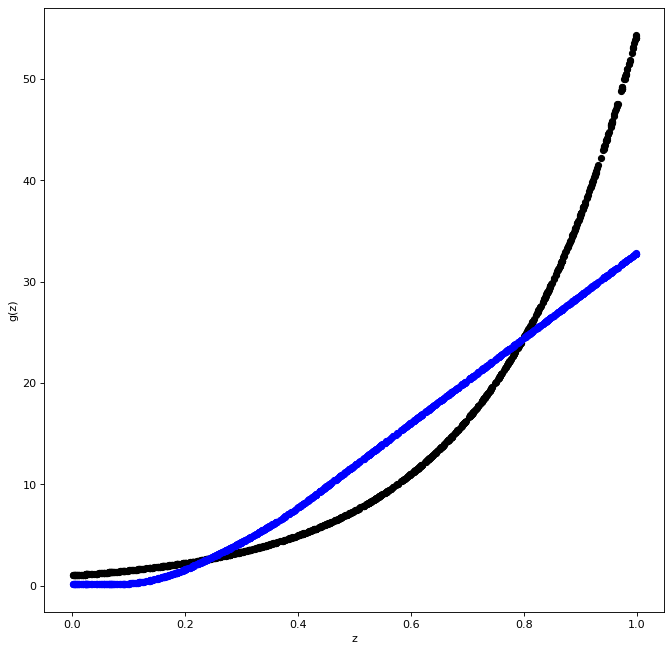

In [8]:
num_epochs = 1
model.fit( X_train, Y_train, epochs= num_epochs , batch_size=10, verbose = 0 )

pred_NN = model.predict( X_train )

fig = plt.figure( figsize = ( 10 , 10 ) , dpi = 80 )
ax1 = fig.add_subplot( 111 )
ax1.scatter( X_train , Y_train, c='black', marker="o" , s = 30 )
ax1.scatter(  X_train , pred_NN , c='blue', marker="o" , s = 30)
plt.xlabel( "z" )
plt.ylabel( "g(z)" )
plt.show()

 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 1ms/step


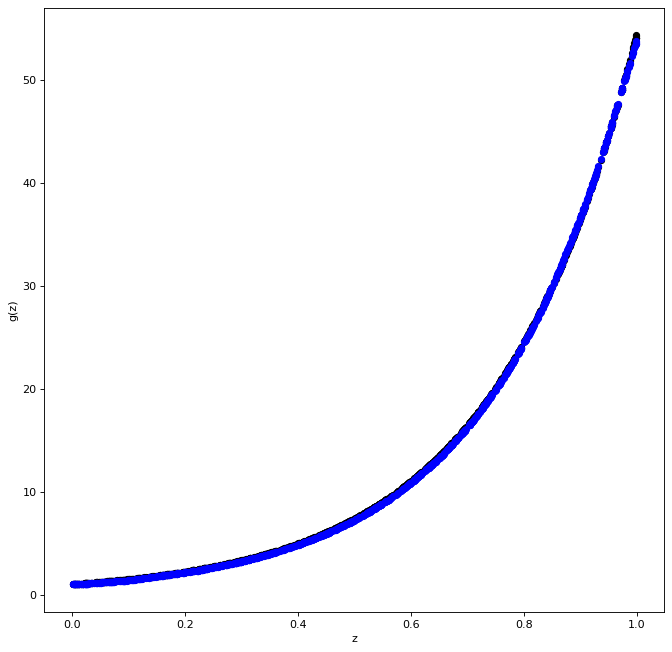

In [9]:
num_epochs = 100
model.fit( X_train, Y_train, epochs= num_epochs , batch_size=10, verbose = 0 )

pred_NN = model.predict( X_train )

fig = plt.figure( figsize = ( 10 , 10 ) , dpi = 80 )
ax1 = fig.add_subplot( 111 )
ax1.scatter( X_train , Y_train, c='black', marker="o" , s = 30 )
ax1.scatter(  X_train , pred_NN , c='blue', marker="o" , s = 30)
plt.xlabel( "z" )
plt.ylabel( "g(z)" )
plt.show()